In [1]:
library(ZINB.GP)
library(Matrix)
library(sp)
library(basemaps)
library(ggplot2)
library(sf)
library(ggOceanMaps)


Attaching package: ‘ZINB.GP’


The following object is masked from ‘package:stats’:

    kernel


Warning message:
“package ‘sp’ was built under R version 4.4.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.4.0”
Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE

ggOceanMaps: Setting data download folder to a temporary folder
/tmp/Rtmpoof7pT. This means that any downloaded map data need to be
downloaded again when you restart R. To avoid this problem, change the
default path to a permanent folder on your computer. Add following
lines to your .Rprofile file: {.ggOceanMapsenv <- new.env();
.ggOceanMapsenv$datapath <- 'YourCustomPath'}. You can use
usethis::edit_r_profile() to edit the file. '~/ggOceanMapsLargeData'
would make it in a writable folder on most operating systems.


Attaching package: ‘ggOceanMaps’


The following object is masked from ‘package:basemaps’:

    basemap




In [2]:
sf_proj_search_paths(c("/home/mascott/work/R_Proj/usr/share/proj"))

[1] "/home/mascott/work/R_Proj/usr/share/proj"

In [3]:
setwd("/home/mascott/work/ZINBR/experiments/landslides")

In [4]:
load("outMat.rda")

In [5]:
attributes(output)

$names
 [1] "Alpha"   "Beta"    "A"       "B"       "C"       "D"       "L1t"    
 [8] "Sigma1t" "Noise1t" "L2t"     "Sigma2t" "Noise2t" "L1s"     "Sigma1s"
[15] "Noise1s" "L2s"     "Sigma2s" "Noise2s" "R"       "Y_pred"  "at_risk"

In [162]:
logit <- \(x) log(x / (1 - x))
clip <- \(x) pmax(pmin(x, 10), -10)
sigmoid <- \(x) exp(x) / (1 + exp(x))

Trace plots for coefficients|


In [87]:
xcols <- c("intercept", "elev_std", "coef2")
for (i in 1:ncol(output$Alpha))
{
    png(paste("trace/conv", xcols[i], "lr.png", sep=""), width = 800, height = 800, units = "px", res = 150) 
    plot(output$Alpha[,i], main=paste("LR coefficient:", xcols[i]), type="o")
    dev.off()
}
for (i in 1:ncol(output$Beta))
{
    png(paste("trace/conv", xcols[i], "nb.png", sep=""), width = 800, height = 800, units = "px", res = 150)
    plot(output$Beta[,i], main=paste("NB coefficient:", xcols[i]), type="o")
    dev.off()
}

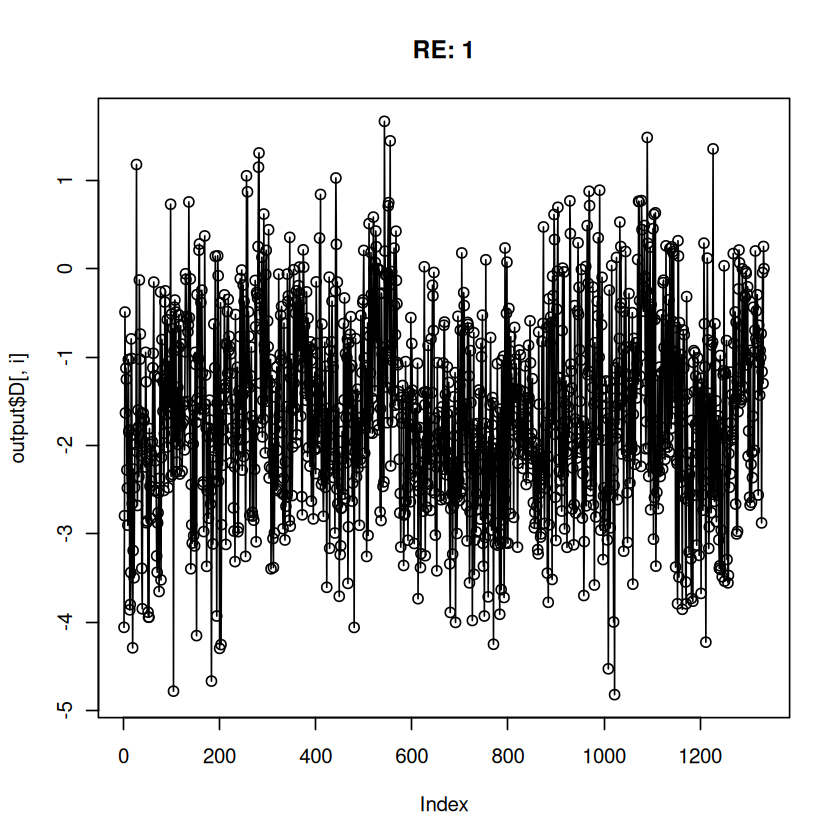

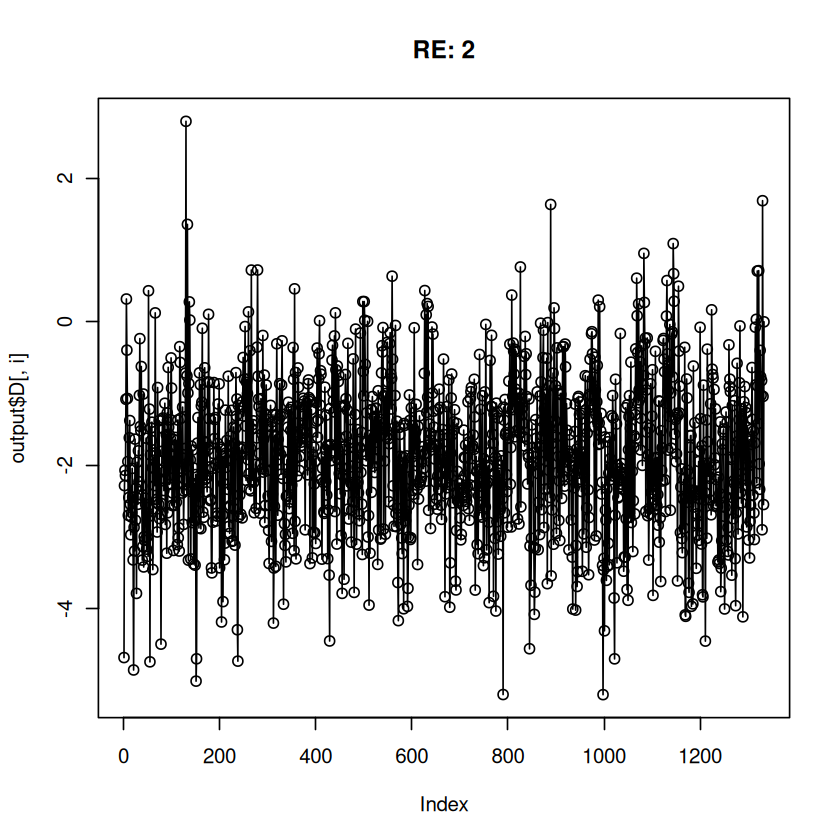

In [5]:
for (i in 1:2)
{
    plot(output$D[,i], main=paste("RE:", i), type="o")
}

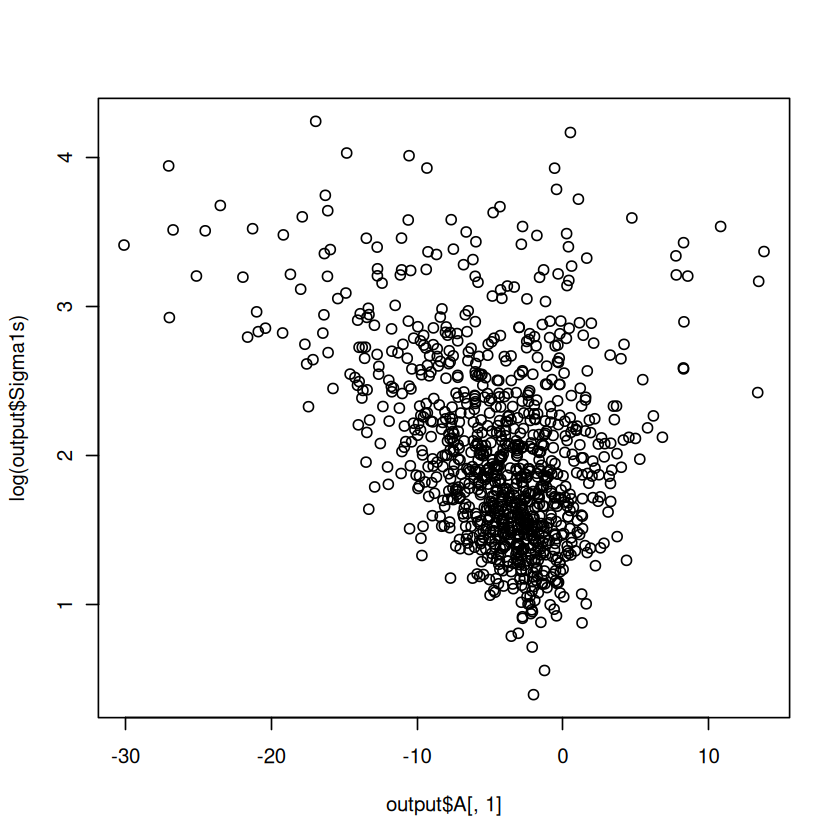

In [9]:
plot(output$A[,1], log(output$Sigma1s))

In [10]:
png("trace/trR.png", width = 800, height = 800, units = "px", res = 150) 
plot(output$R, main="R", type="o")
dev.off()

png 
  2

In [90]:
png("trace/trl1t.png", width = 800, height = 800, units = "px", res = 150) 
plot((output$L1t), main="Logistic Regression Temporal Length Scale", type="o", xlab="Iteration", ylab="Length Scale")
dev.off()
png("trace/trl1s.png", width = 800, height = 800, units = "px", res = 150) 
plot((output$L1s), main="L1s", type="o")
dev.off()

png("trace/trl2t.png", width = 800, height = 800, units = "px", res = 150) 
plot((output$L2t), main="L2t", type="o")
dev.off()
png("trace/trl2s.png", width = 800, height = 800, units = "px", res = 150) 
plot((output$L2s), main="L2s", type="o")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [12]:
png("trace/trsigma1t.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$Sigma1t), main="Sigma1t", type="o")
dev.off()
png("trace/trsigma1s.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$Sigma1s), main="Sigma1s", type="o")
dev.off()

png("trace/trsigma2t.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$Sigma2t), main="Sigma2t", type="o")
dev.off()
png("trace/trsigma2s.png", width = 800, height = 800, units = "px", res = 150) 
plot(log(output$Sigma2s), main="Sigma2s", type="o")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [13]:
png("trace/trnr1t.png", width = 800, height = 800, units = "px", res = 150) 
plot(logit(output$Noise1t), main="Noise1t", type="o")
dev.off()
png("trace/trnr1s.png", width = 800, height = 800, units = "px", res = 150) 
plot(logit(output$Noise1s), main="Noise1s", type="o")
dev.off()

png("trace/trnr2t.png", width = 800, height = 800, units = "px", res = 150) 
plot(logit(output$Noise2t), main="Noise2t", type="o")
dev.off()
png("trace/trnr2s.png", width = 800, height = 800, units = "px", res = 150) 
plot(logit(output$Noise2s), main="Noise2s", type="o")
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

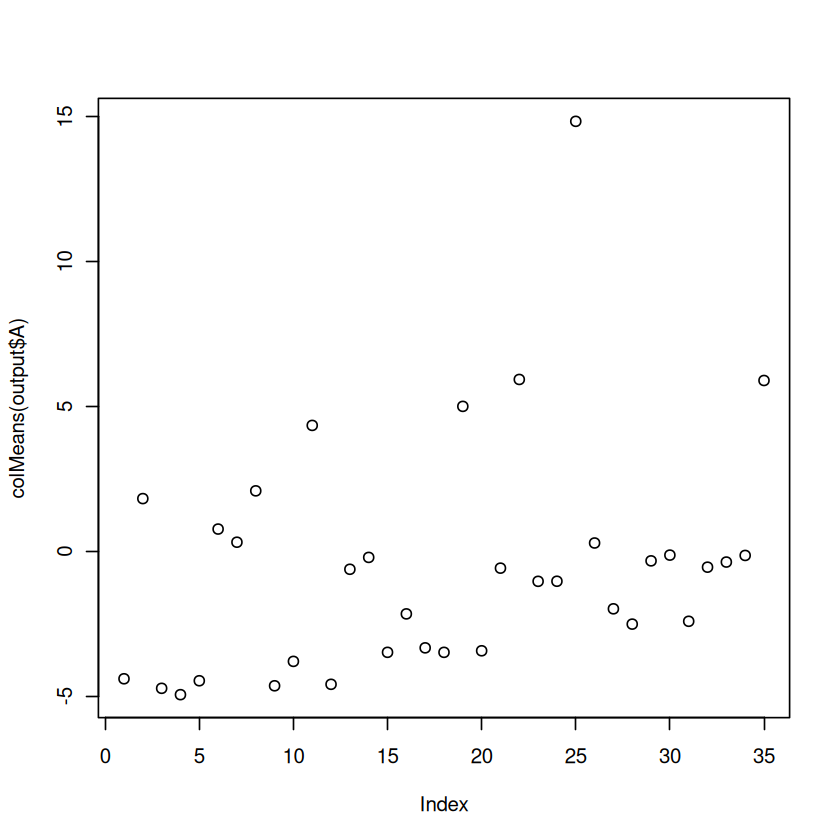

In [14]:
plot(colMeans(output$A))

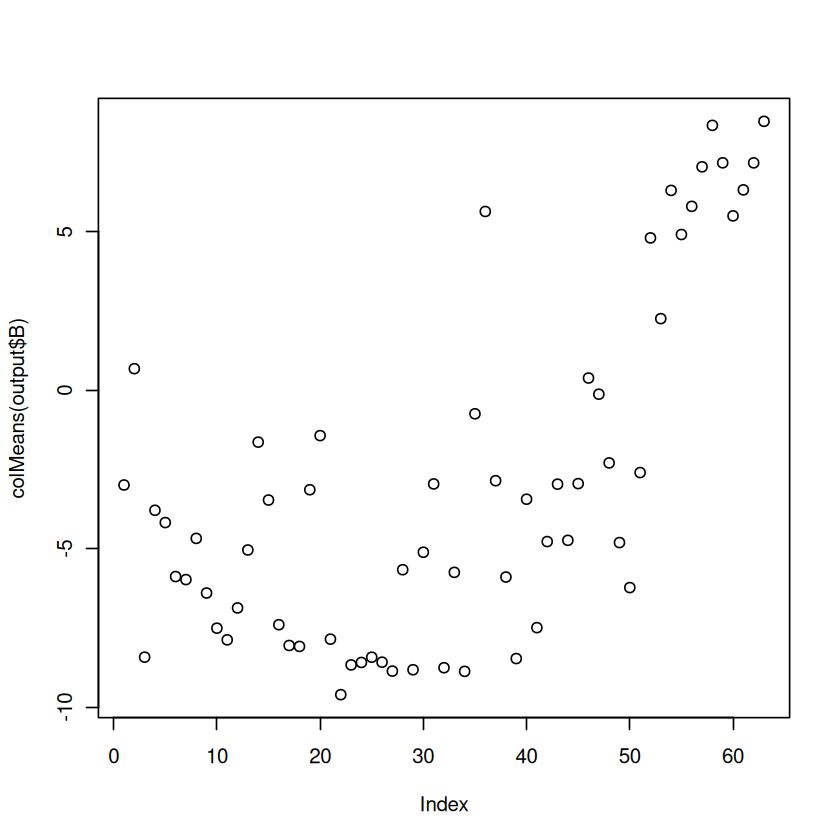

In [15]:
plot(colMeans(output$B))

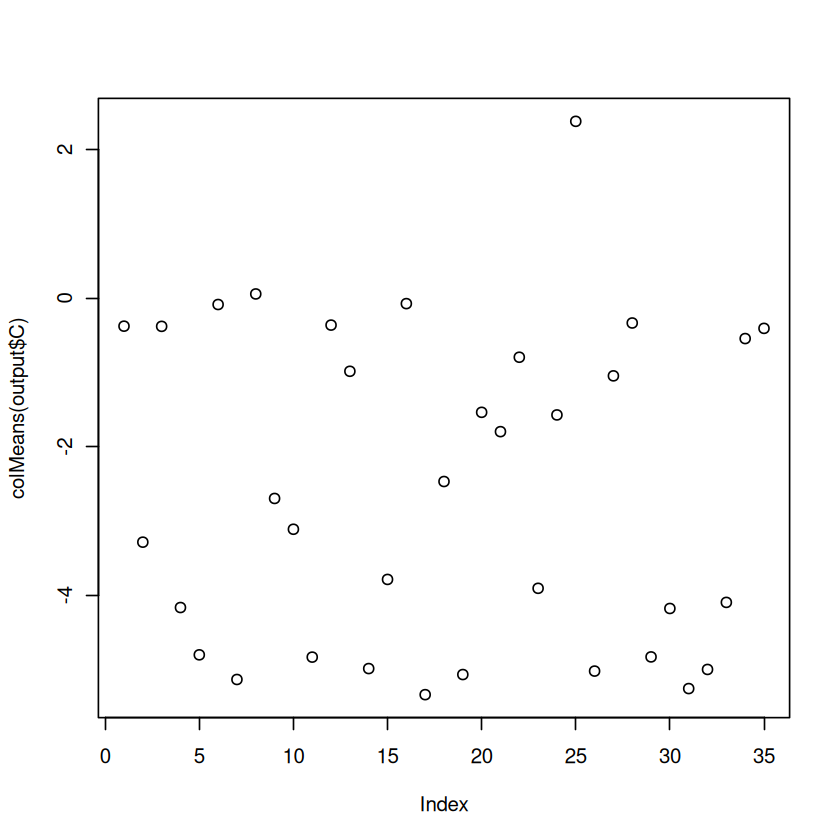

In [16]:
plot(colMeans(output$C))

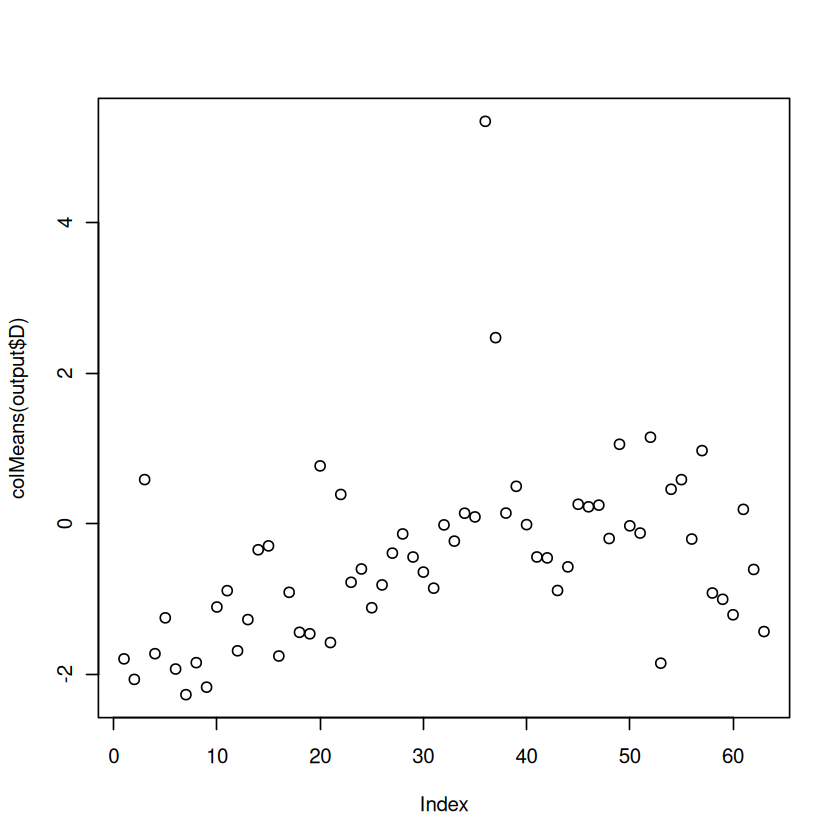

In [17]:
plot(colMeans(output$D))

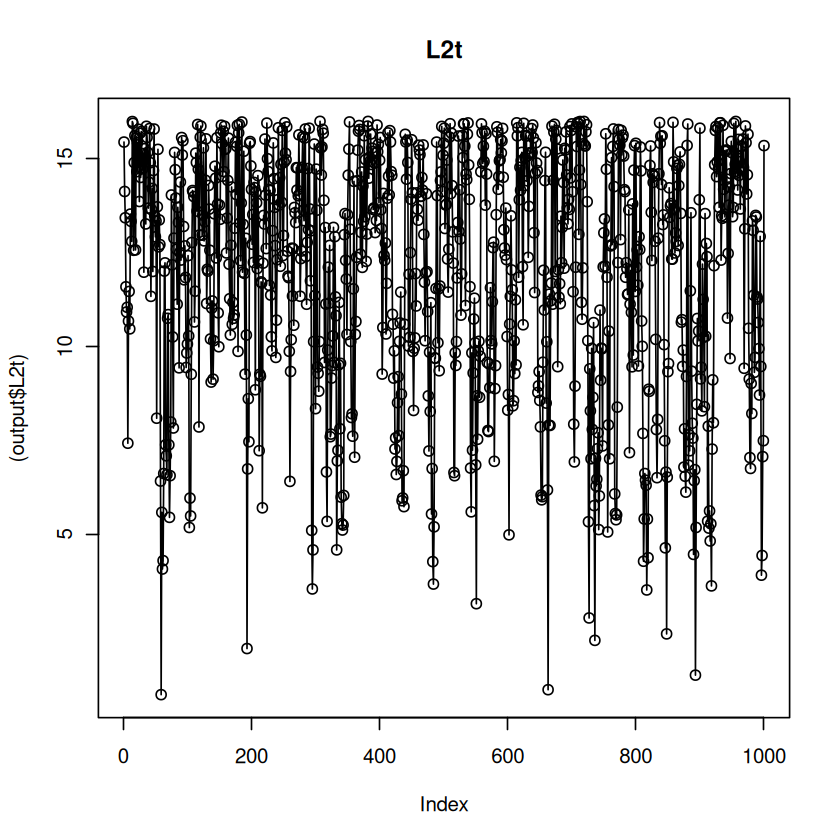

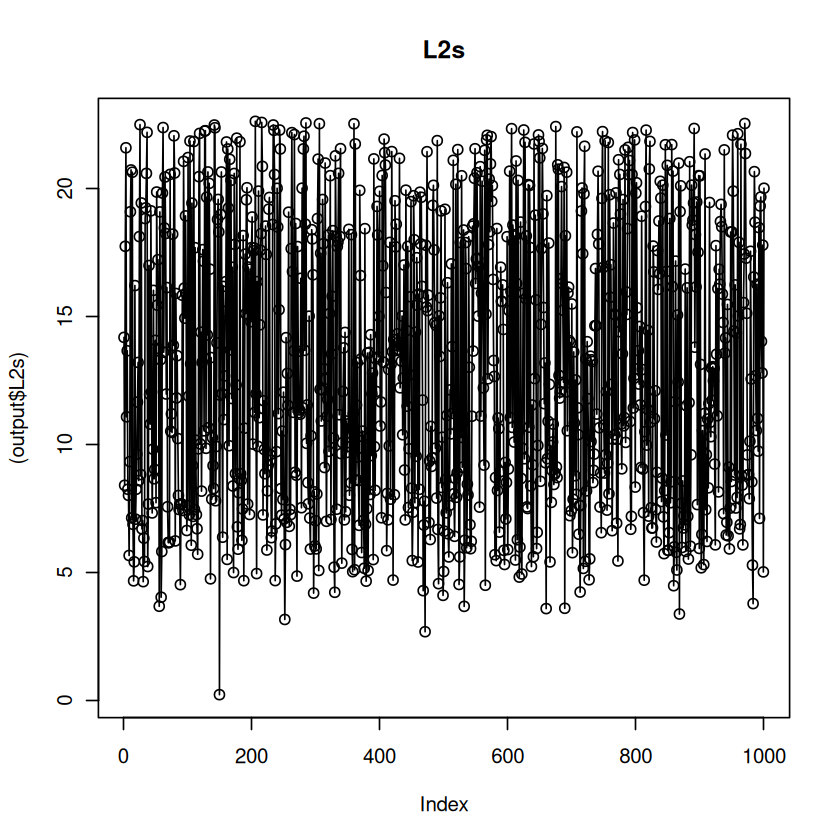

In [18]:
plot((output$L2t), main="L2t", type="o")
plot((output$L2s), main="L2s", type="o")

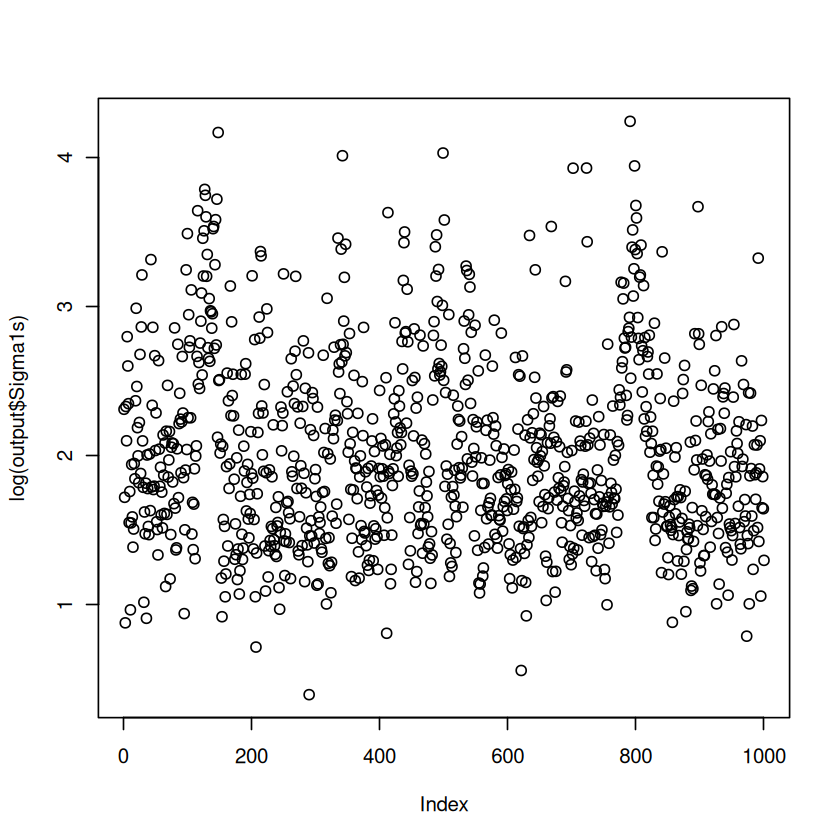

In [19]:
plot(log(output$Sigma1s))

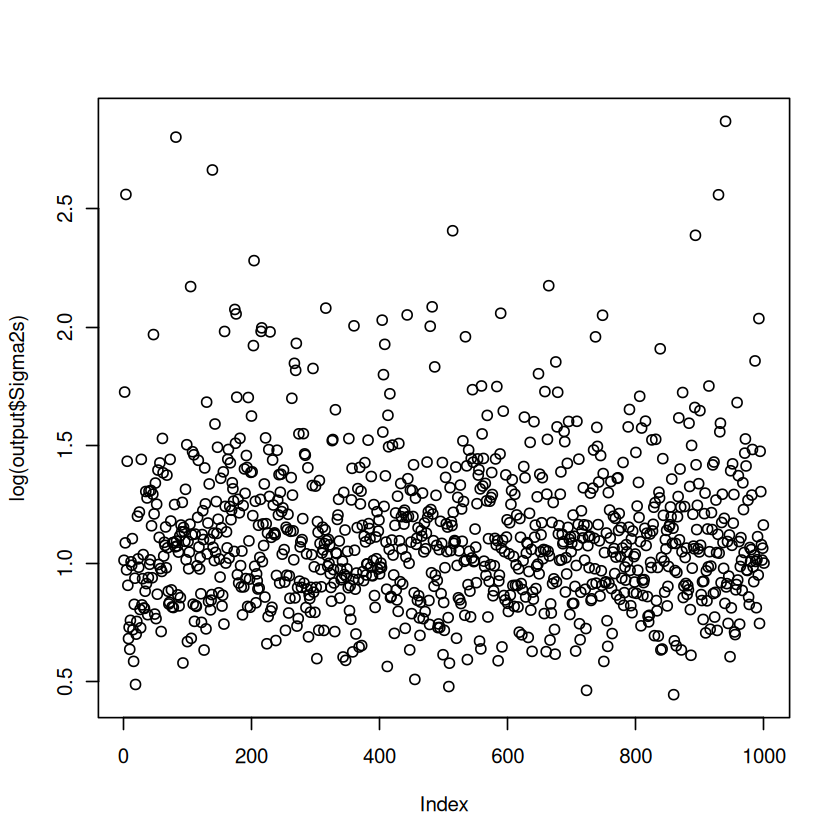

In [20]:
plot(log(output$Sigma2s))

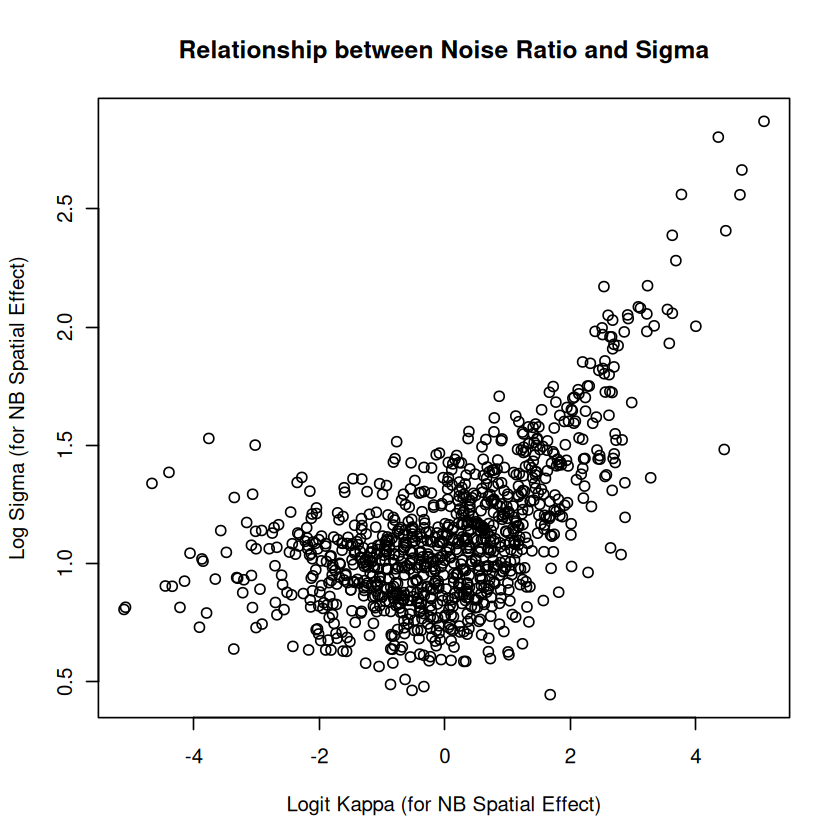

In [94]:
plot(logit(output$Noise2s), log(output$Sigma2s), main="Relationship between Noise Ratio and Sigma", ylab="Log Sigma (for NB Spatial Effect)", xlab="Logit Kappa (for NB Spatial Effect)")

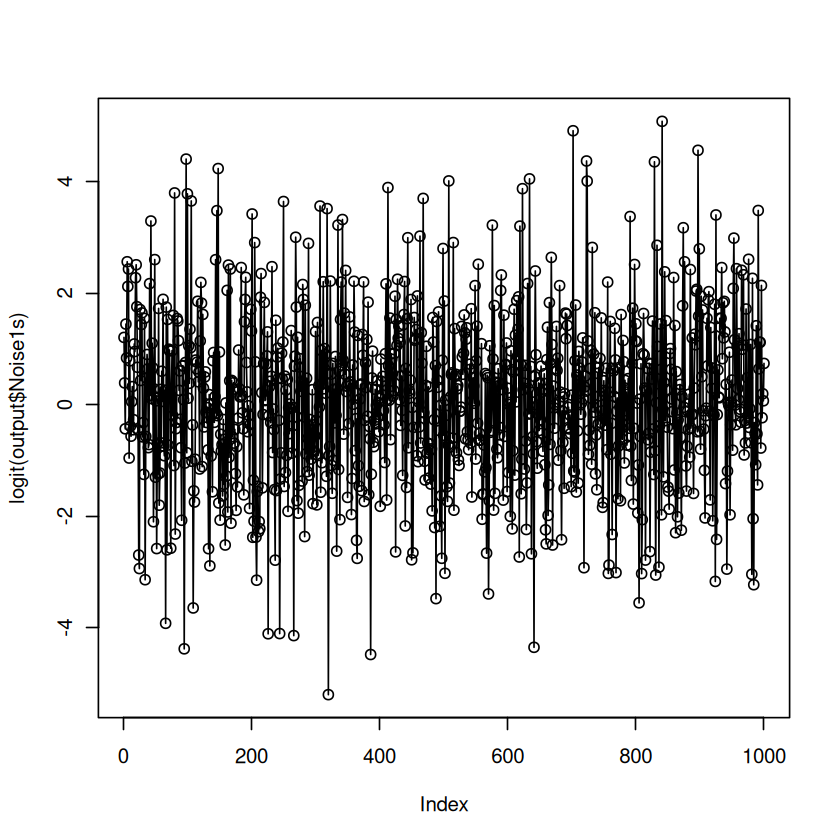

In [92]:
plot(logit(output$Noise1s), type="o")

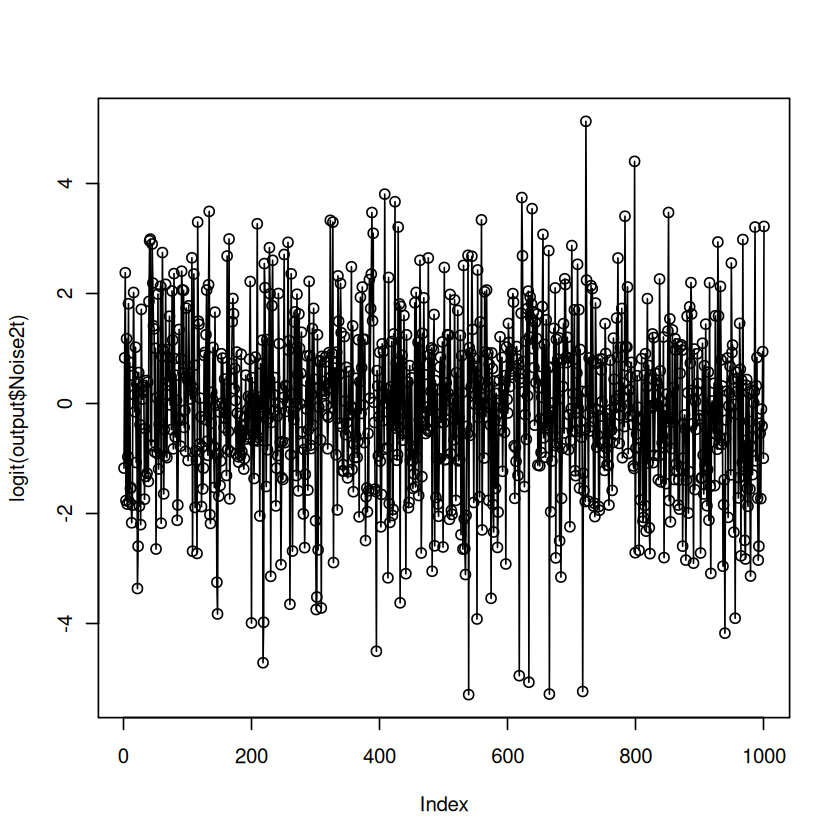

In [45]:
plot(logit(output$Noise2t), type="o")

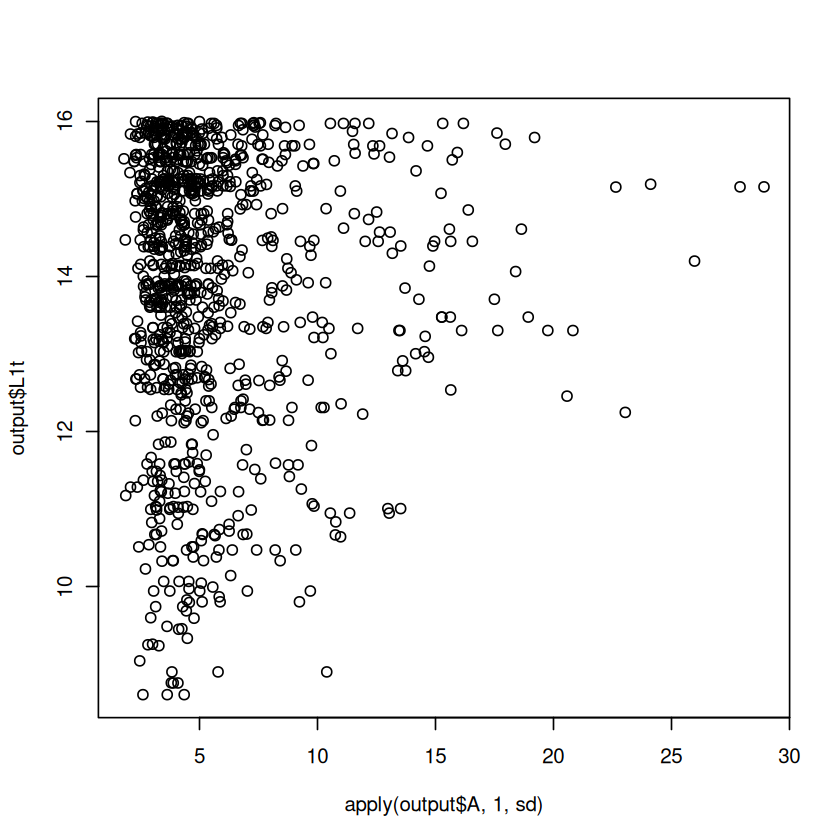

In [25]:
plot(apply(output$A, 1, sd), output$L1t)

In [26]:
apply(output$B, 2, \(x) quantile(x, probs = c(0.025, 0.975)))

2.5%,-15.487070,-7.253668,-23.6028301,-16.724436,-16.331408,-21.155163,-23.125704,-17.806541,-24.425296,-24.741819,⋯,-3.376308,-3.435467,-3.039244,-0.5545795,-0.7497634,-2.888883,-5.721634,-3.515398,-3.338922,-1.58477
97.5%,6.060512,14.852152,-0.1327792,5.720043,4.672582,3.988959,4.289726,3.455011,2.854639,2.042455,⋯,27.823249,21.737534,25.861896,25.8589596,34.0141712,29.786379,26.483705,25.694124,31.853488,30.41582


In [27]:
interval <- \(x) quantile(x, probs=c(0.025, 0.975))

In [30]:
apply(output$Alpha, 2, interval)

2.5%,-0.2109440,-0.09398839
97.5%,0.2039653,0.18111324


In [31]:
apply(output$Beta, 2, interval)

2.5%,-0.2502490,-0.05640084
97.5%,0.1318465,0.09722297


In [95]:
counties

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

OBJECTID,COUNTY_NAME,COBCODE,ORIG_FID,geometry
<int>,<chr>,<chr>,<int>,<POLYGON [°]>
1,JOSEPHINE,OR033,75,POLYGON ((-123.7165 42.7828...
2,CURRY,OR015,74,POLYGON ((-124.3904 42.9552...
3,JACKSON,OR029,73,POLYGON ((-122.3764 42.9966...
4,COOS,OR011,72,POLYGON ((-124.1813 43.6114...
5,KLAMATH,OR035,71,POLYGON ((-121.4714 43.6166...
6,LAKE,OR037,70,POLYGON ((-120.975 43.61568...
7,DOUGLAS,OR019,69,POLYGON ((-123.8221 43.9447...
8,HARNEY,OR025,68,POLYGON ((-118.812 44.04781...
9,LANE,OR039,67,POLYGON ((-122.7615 44.2903...


In [69]:
countyCoords <- as.matrix(unname(read.table("counties_coords.dat")))
counties <- st_read("./orCounties.geojson")
years <- read.csv("Years.csv")$X0

Reading layer `orCounties' from data source 
  `/home/mascott/work/ZINBR/experiments/landslides/orCounties.geojson' 
  using driver `GeoJSON'
Simple feature collection with 36 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -124.7038 ymin: 41.99208 xmax: -116.4632 ymax: 46.29239
Geodetic CRS:  WGS 84


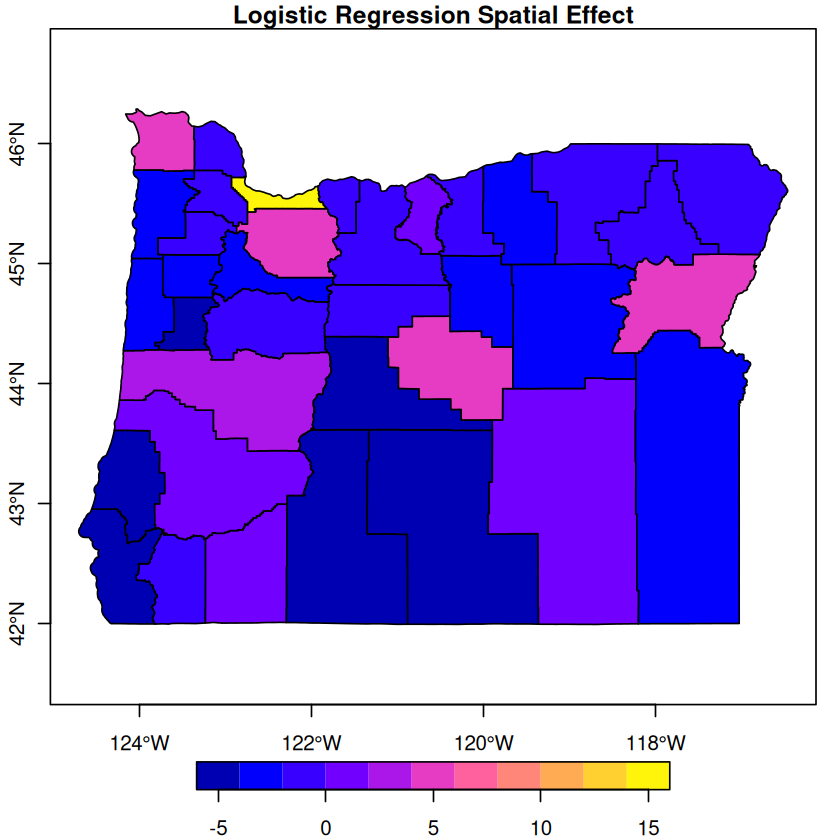

In [106]:
lr_s_re <- c(mean(output$Alpha[,1]),colMeans(output$A))
counties$lr_s_re <- lr_s_re
plot(counties["lr_s_re"], main="Logistic Regression Spatial Effect", axes=TRUE)

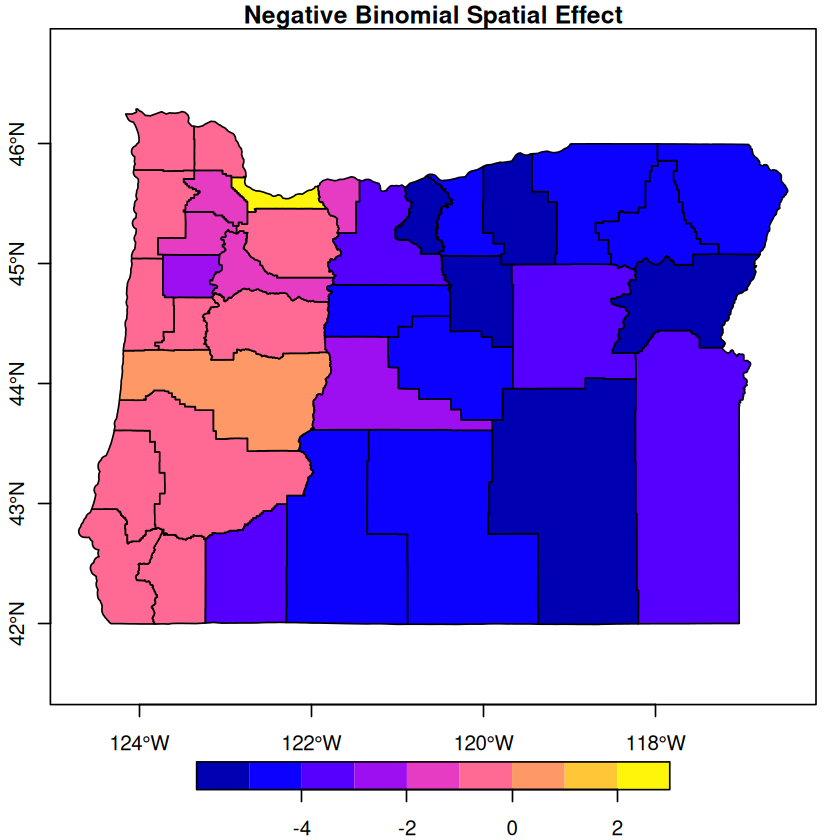

In [108]:
nb_s_re <- c(mean(output$Beta[,1]),colMeans(output$C))
counties$nb_s_re <- nb_s_re
plot(counties["nb_s_re"], main="Negative Binomial Spatial Effect", axes=TRUE)

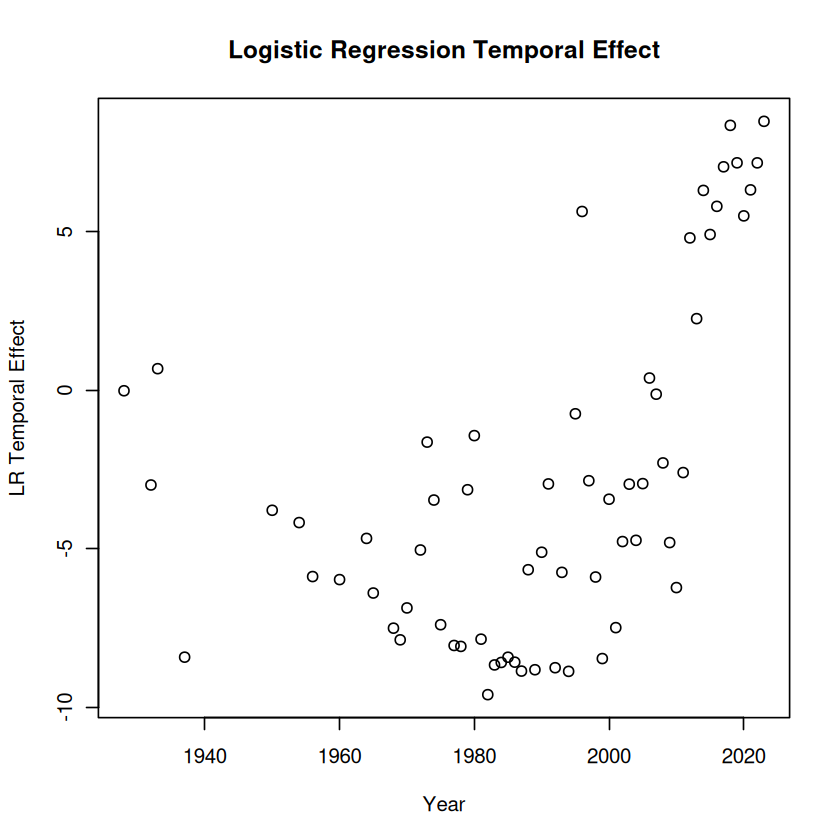

In [76]:
plot(years, c(mean(output$Alpha[,1]), colMeans(output$B)), main="Logistic Regression Temporal Effect", xlab="Year", ylab="LR Temporal Effect")

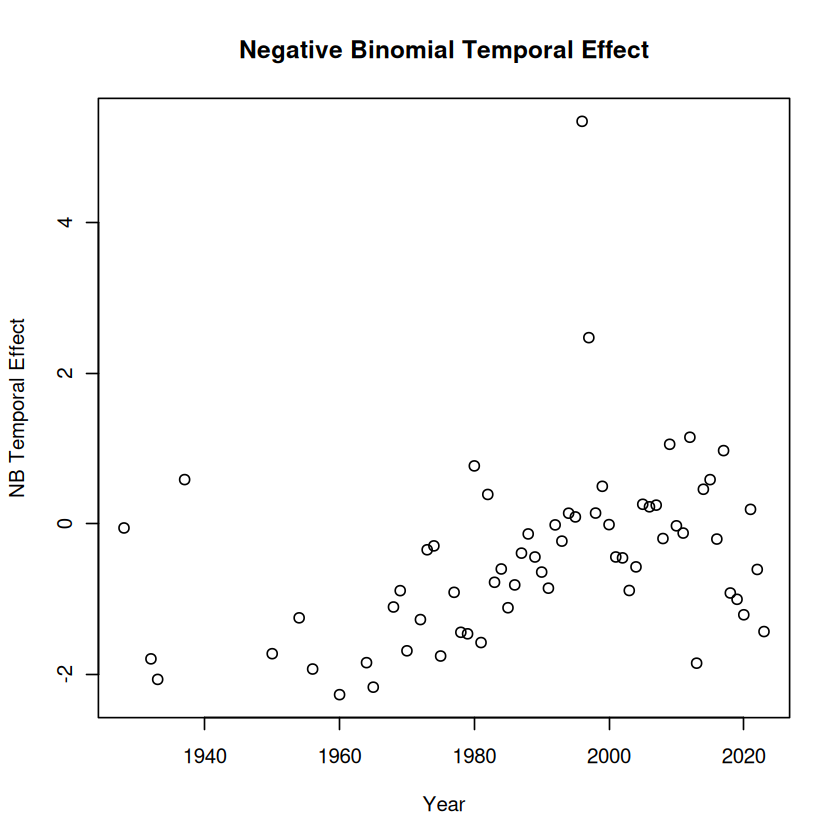

In [75]:
plot(years, c(mean(output$Beta[,1]), colMeans(output$D)), main="Negative Binomial Temporal Effect", xlab="Year", ylab="NB Temporal Effect")

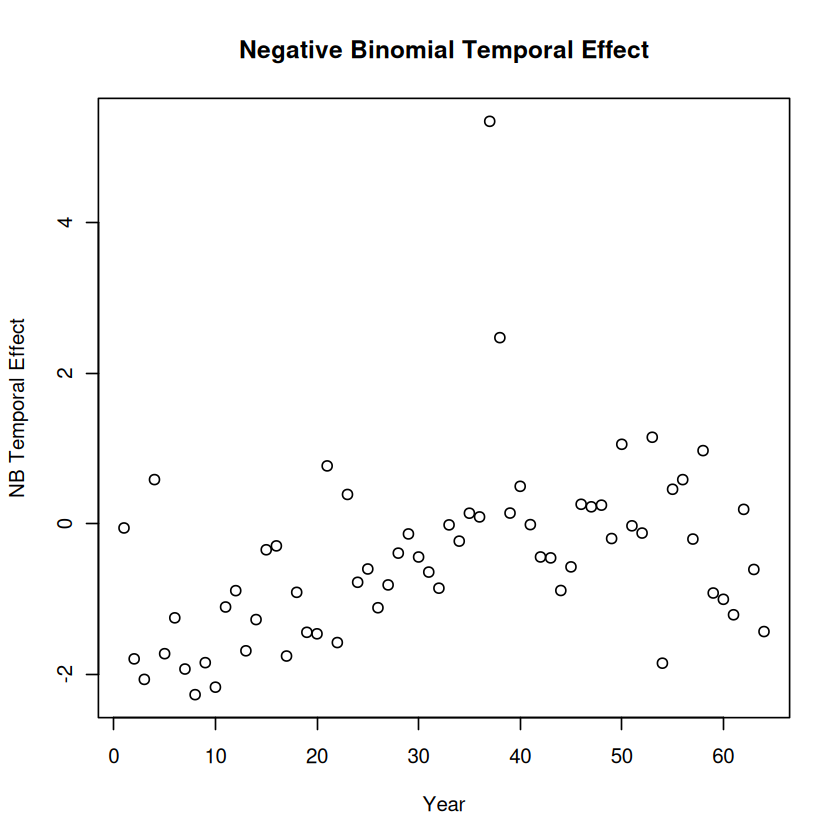

In [120]:
plot(c(mean(output$Beta[,1]), colMeans(output$D)), main="Negative Binomial Temporal Effect", xlab="Year", ylab="NB Temporal Effect")

In [150]:
quantile(output$D[,36], 0.90)

90% 
6.571575

In [149]:
quantile(output$B[,36], 0.90)

90% 
13.52426

In [151]:
# Read in our data to make some more predictions
obs_matrix <- read.table("landslides_county_year.dat")
out <- make_y_Vs_Vt(obs_matrix)

Vs <- out$Vs
Vt <- out$Vt
y <- out$y
Ds <- as.matrix(unname(read.table("county_dist_scale.dat")))
Dt <- as.matrix(unname(read.table("time_dist.dat")))
scale_t <- 0.001 * max(Dt)
Dt <- Dt / scale_t
Ds <- Ds * 100

countyData <- read.csv("counties.csv")
countyCoords <- as.matrix(unname(read.table("counties_coords.dat")))
X <- Vs %*% countyData$county_elev_std[2:length(countyData$county_elev_std)]
X <- cbind(1, X)

In [158]:
dim(X)

[1] 2304    2

In [159]:
dim(output$Alpha)

[1] 1000    2

In [172]:
dim(Vs)

[1] 2304   35

In [181]:
apply(Vs, 2, sum)

[1] 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
[26] 64 64 64 64 64 64 64 64 64 64

In [185]:
susceptAvg <- rowMeans(sigmoid(Vs %*% t(output$A) + quantile(output$B[,36], 0.90) + X %*% t(output$Alpha))) %*% Vs / 64

In [201]:
susceptAvg

0.9687322,0.9999506,0.9502669,0.913594,0.9260969,0.999977,0.984679,0.9999902,0.9346958,0.9430149,⋯,0.9859025,0.9883111,0.9940148,0.9710076,0.9845413,0.9523137,0.9805804,0.9823811,0.9966623,0.9999993


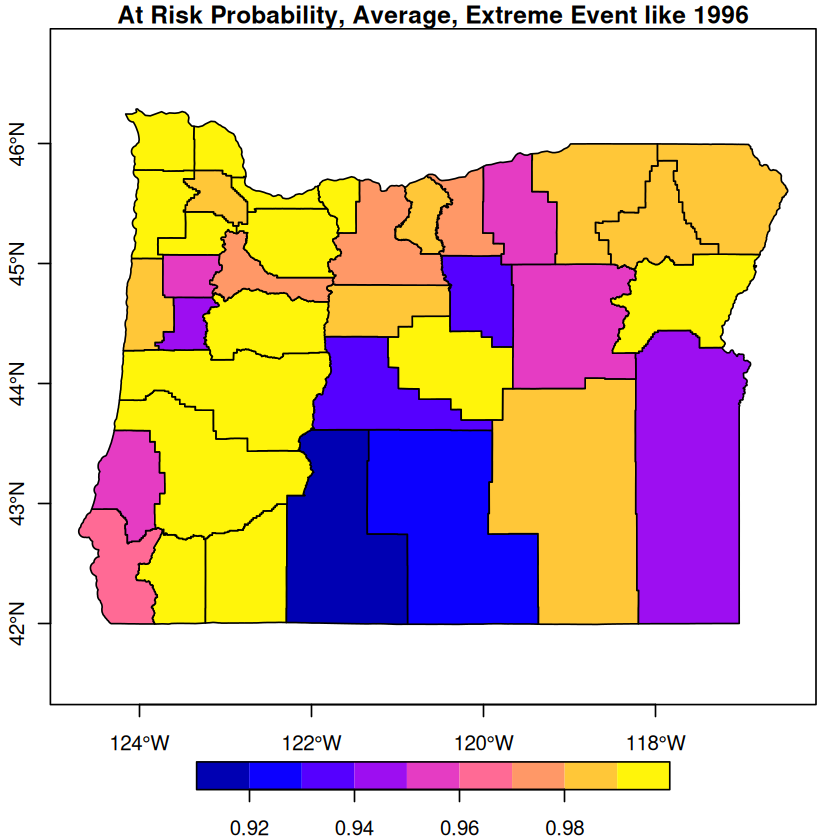

In [203]:
counties$lr_suscept_avg <- c(sigmoid(quantile(output$B[,36], 0.9) + mean(output$Alpha[,1])), susceptAvg)
plot(counties["lr_suscept_avg"], main="At Risk Probability, Average, Extreme Event like 1996", axes=TRUE)

In [ ]:
int_rows <- apply(Vs == 0, 1, all)

In [390]:
p <- sigmoid(Vs %*% t(output$C) + quantile(output$D[,36], 0.90) + X %*% t(output$Beta))
rands <- matrix(0, nrow=nrow(p), ncol=ncol(p))
for (i in 1:nrow(p))
{
    for(j in 1:ncol(p))
    {
        rands[i,j] <- rnbinom(n=1, size=output$R[j], prob=(1 - p[i,j]))
    }
}

In [394]:
avgSlides <- rowMeans((t(Vs) %*% rands) / 64)

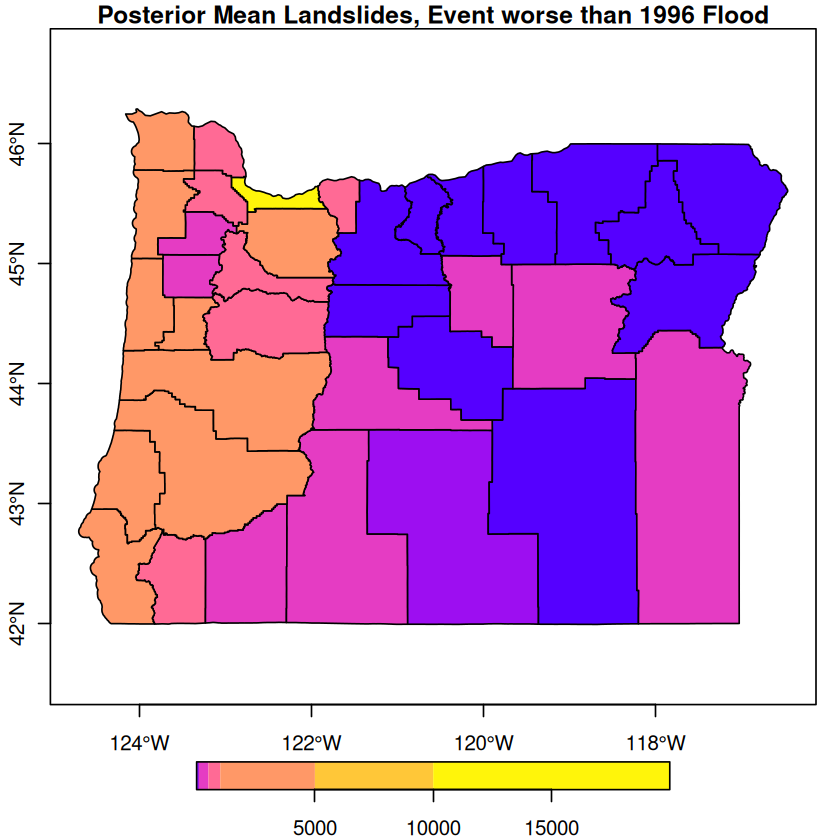

In [417]:
counties$nb_res_avg <- (c(mean(apply(rands[int_rows,], 2, sum) / 64) * sigmoid(quantile(output$B[,36], 0.9) + mean(output$Alpha[,1])), avgSlides * susceptAvg))
plot(counties["nb_res_avg"], main="Posterior Mean Landslides, Event worse than 1996 Flood", axes=TRUE, breaks=c(1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 20000))

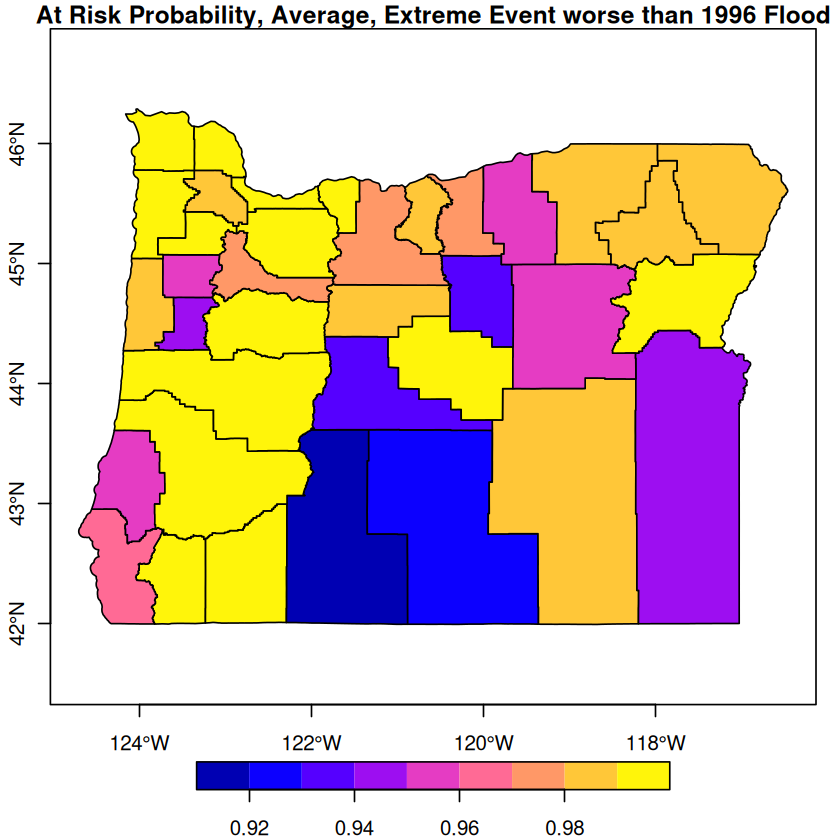

In [408]:
counties$nb_res_avg <- c(sigmoid(quantile(output$B[,36], 0.9) + mean(output$Alpha[,1])), susceptAvg)
plot(counties["nb_res_avg"], main="At Risk Probability, Average, Extreme Event worse than 1996 Flood", axes=TRUE)